In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('duckdb_benchmark.csv', header=None, names=['tpch', 'type', 'ns', 'miti'])
df

,tpch,type,ns,miti
0,1,COLD,452958941,normal
1,1,HOT,342159485,normal
2,2,COLD,225679129,normal
3,2,HOT,189729266,normal
4,3,COLD,327791864,normal
5,3,HOT,218166508,normal
6,4,COLD,1062581950,normal
7,4,HOT,644597541,normal
8,5,COLD,392672565,normal
9,5,HOT,281959943,normal


In [31]:
hot_df = df[df['type'] == 'HOT']
hot_df = pd.pivot(hot_df, values='ns', index='tpch', columns='miti')
hot_df['block'] = hot_df['block'] / hot_df['normal']
hot_df['chunk'] = hot_df['chunk'] / hot_df['normal']
hot_df['full'] = hot_df['full'] / hot_df['normal']
hot_df['normal'] = hot_df['normal'] / hot_df['normal']
hot_df = hot_df.drop(22)
hot_df

miti,block,chunk,full,normal
tpch,,,,
1,7.454834,1.297515,7.500854,1.0
2,2.589545,1.164090,2.746171,1.0
3,8.360122,1.201846,8.189424,1.0
4,8.946486,1.159835,9.112156,1.0
5,6.158777,1.189767,6.357449,1.0
6,17.351061,1.293471,17.734455,1.0
7,4.205193,1.245903,4.386310,1.0
8,9.987704,1.284847,10.268460,1.0
9,3.606475,1.163930,3.767332,1.0


In [26]:
cold_df = df[df['type'] == 'COLD']
cold_df = pd.pivot(cold_df, values='ns', index='tpch', columns='miti')
cold_df['block'] = cold_df['block'] / cold_df['normal']
cold_df['chunk'] = cold_df['chunk'] / cold_df['normal']
cold_df['full'] = cold_df['full'] / cold_df['normal']
cold_df['normal'] = cold_df['normal'] / cold_df['normal']
cold_df = cold_df.drop(22)
cold_df

miti,block,chunk,full,normal
tpch,,,,
1,5.832532,1.219923,5.904113,1.0
2,2.334317,1.148071,2.463631,1.0
3,5.856514,1.134428,5.779450,1.0
4,6.054214,1.102405,5.907418,1.0
5,4.691974,1.128204,4.897150,1.0
6,9.674322,1.159494,9.860774,1.0
7,3.559266,1.153985,3.708357,1.0
8,6.668508,1.275937,6.847364,1.0
9,3.061153,1.136461,3.182652,1.0


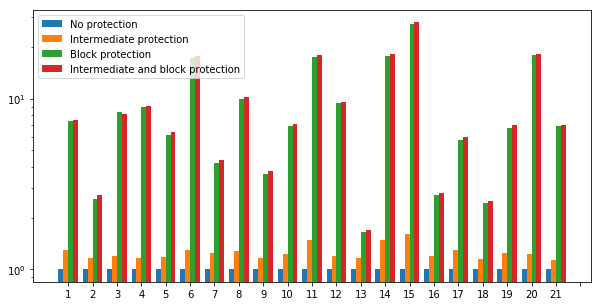

In [50]:
fig, ax = plt.subplots(figsize=(10,5))


width = 0.2         # the width of the bars
r1 = np.arange(len(hot_df))    # the x locations for the groups
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

p1 = ax.bar(r1, hot_df['normal'], width, bottom=0, label='No protection')
p1 = ax.bar(r2, hot_df['chunk'], width, bottom=0, label='Intermediate protection')
p1 = ax.bar(r3, hot_df['block'], width, bottom=0, label='Block protection')
p1 = ax.bar(r4, hot_df['full'], width, bottom=0, label='Intermediate and block protection')
ax.set_xticks(ind  + width * 3 / 2)
ax.set_yscale('log')
ax.set_xticklabels(range(1, 22))
ax.autoscale_view()
ax.legend()

plt.show()

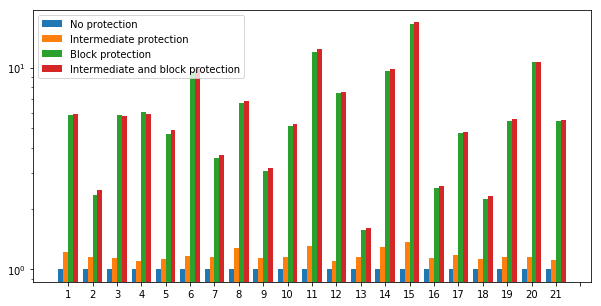

In [51]:
fig, ax = plt.subplots(figsize=(10,5))

p1 = ax.bar(r1, cold_df['normal'], width, bottom=0, label='No protection')
p1 = ax.bar(r2, cold_df['chunk'], width, bottom=0, label='Intermediate protection')
p1 = ax.bar(r3, cold_df['block'], width, bottom=0, label='Block protection')
p1 = ax.bar(r4, cold_df['full'], width, bottom=0, label='Intermediate and block protection')
ax.set_xticks(ind  + width * 3 / 2)
ax.set_yscale('log')
ax.set_xticklabels(range(1, 22))
ax.autoscale_view()
ax.legend()

plt.show()